In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [3]:
from nltk.corpus import stopwords

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [8]:
from sklearn.linear_model import LogisticRegression

In [11]:
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

In [12]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [13]:
real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [14]:
fake['label'] = 0
real['label'] = 1

In [17]:
news = pd.concat([fake, real], ignore_index=True)

In [18]:
news

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [19]:
news = news.drop(['title', 'subject', 'date'], axis=1)

In [20]:
news


,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [21]:
def remove_punctuations(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [24]:
news['text'] = news['text'].apply(remove_punctuations)

In [25]:
news['text'] = news['text'].apply(lambda x: x.lower())

In [26]:
stop_words = stopwords.words('english')

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [28]:
from nltk.corpus import stopwords

In [29]:
news['text'] = news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [30]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(news['text'])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, news['label'], test_size=0.2, random_state=42)

In [32]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [33]:
y_pred_nb = nb.predict(x_test)
print('Accuracy score of Naive Bayes:', accuracy_score(y_test, y_pred_nb))

Accuracy score of Naive Bayes: 0.9355233853006681


In [34]:
print('Confusion matrix of Naive Bayes:\n', confusion_matrix(y_test, y_pred_nb))

Confusion matrix of Naive Bayes:
 [[4474  259]
 [ 320 3927]]


In [35]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred_lr = lr.predict(x_test)
print('Accuracy score of Logistic Regression:', accuracy_score(y_test, y_pred_lr))

Accuracy score of Logistic Regression: 0.9868596881959911


In [37]:
print('Confusion matrix of Logistic Regression:\n', confusion_matrix(y_test, y_pred_lr))

Confusion matrix of Logistic Regression:
 [[4670   63]
 [  55 4192]]


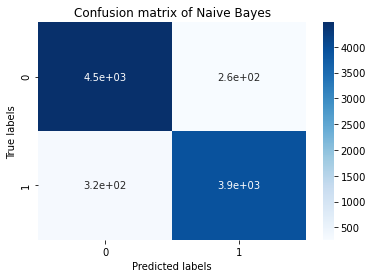

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, cmap='Blues')
plt.title('Confusion matrix of Naive Bayes')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Text(33.0, 0.5, 'True labels')

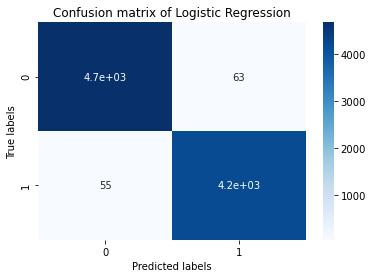

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap='Blues')
plt.title('Confusion matrix of Logistic Regression')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')